In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df_1 = pd.read_csv("../dataset/train_FD001.txt", sep=" ", header=None)
df_2 = pd.read_csv("../dataset/train_FD002.txt", sep=" ", header=None)
df_3 = pd.read_csv("../dataset/train_FD003.txt", sep=" ", header=None)
df_4 = pd.read_csv("../dataset/train_FD004.txt", sep=" ", header=None)

print(df_1.head())


   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]


In [11]:
#Removing NaN columns

df_1 = df_1.iloc[:, :26]
df_2 = df_2.iloc[:, :26]
df_3 = df_3.iloc[:, :26]
df_4 = df_4.iloc[:, :26]

print(df_1.head())


   0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

        25  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044  

[5 rows

In [12]:

missing_values_1 = df_1.isnull().sum()
missing_values_2 = df_2.isnull().sum()
missing_values_3 = df_3.isnull().sum()
missing_values_4 = df_4.isnull().sum()

print("Missing values per column:")
print(missing_values_1)
print(missing_values_2)
print(missing_values_3)
print(missing_values_4)

Missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64


In [13]:
#Assigning column names
col_names = [
    "engine_id", "cycle",
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

df_1.columns = col_names
df_2.columns = col_names
df_3.columns = col_names
df_4.columns = col_names

In [14]:
# Exploratory Data Analysis
print("Engines in DF1:", df_1['engine_id'].nunique())
print("Engines in DF2:", df_2['engine_id'].nunique())
print("Engines in DF3:", df_3['engine_id'].nunique())
print("Engines in DF4:", df_4['engine_id'].nunique())

df_1.groupby("engine_id")["cycle"].max().describe()

Engines in DF1: 100
Engines in DF2: 260
Engines in DF3: 100
Engines in DF4: 249


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64

In [ ]:
# # Data Normalization
# from sklearn.preprocessing import StandardScaler
# import joblib

# sensor_cols = [
#     "op1", "op2", "op3",
#     "s1","s2","s3","s4","s5",
#     "s6","s7","s8","s9","s10",
#     "s11","s12","s13","s14","s15",
#     "s16","s17","s18","s19","s20","s21"
# ]

# def normalize_dataset(df, scaler_path):
#     scaler = StandardScaler()
#     df[sensor_cols] = scaler.fit_transform(df[sensor_cols])
#     joblib.dump(scaler, scaler_path)
#     return df

# df_1 = normalize_dataset(df_1, "FD001_scaler.joblib")
# df_2 = normalize_dataset(df_2, "FD002_scaler.joblib")
# df_3 = normalize_dataset(df_3, "FD003_scaler.joblib")
# df_4 = normalize_dataset(df_4, "FD004_scaler.joblib")

sensor_cols = [
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

def normalize_dataset(df, scaler_path):
    scaler = joblib.load(scaler_path)      
    df[sensor_cols] = scaler.transform(df[sensor_cols])
    return df

# Apply the scalers to TRAIN datasets 
df_1 = normalize_dataset(df_1, "FD001_scaler.joblib")
df_2 = normalize_dataset(df_2, "FD002_scaler.joblib")
df_3 = normalize_dataset(df_3, "FD003_scaler.joblib")
df_4 = normalize_dataset(df_4, "FD004_scaler.joblib")

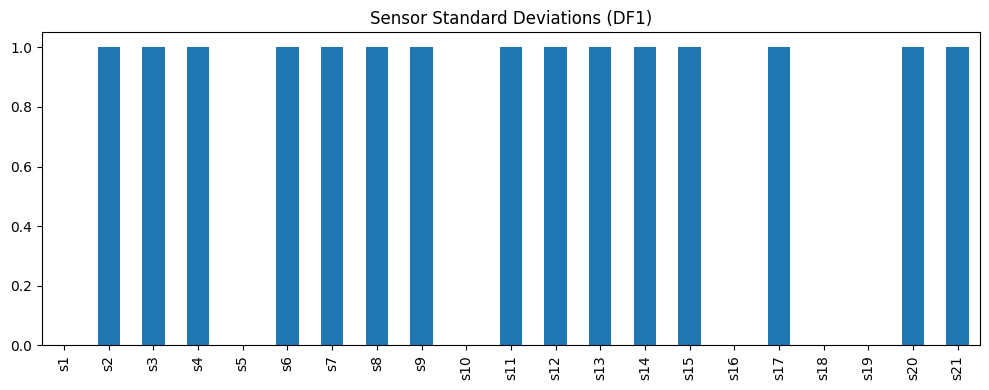


DF1 Dead Sensors: ['op3', 's1', 's5', 's10', 's16', 's18', 's19']


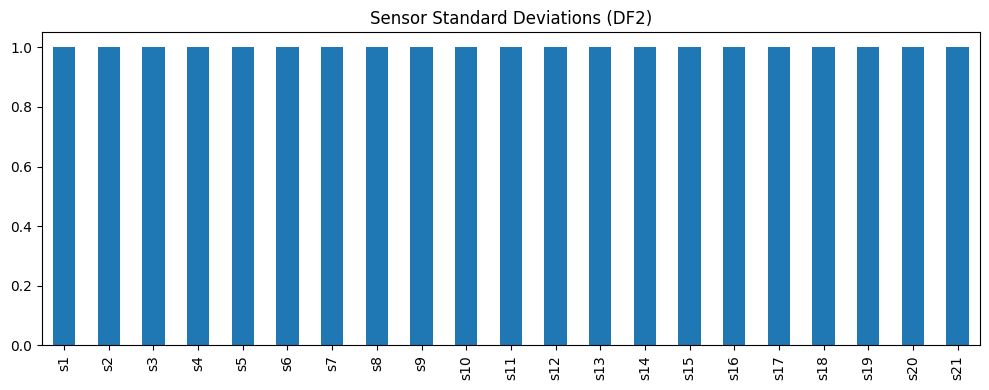


DF2 Dead Sensors: []


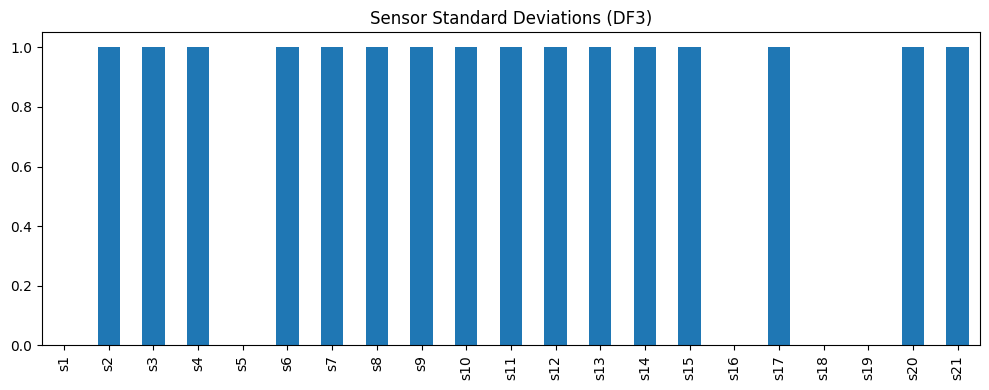


DF3 Dead Sensors: ['op3', 's1', 's5', 's16', 's18', 's19']


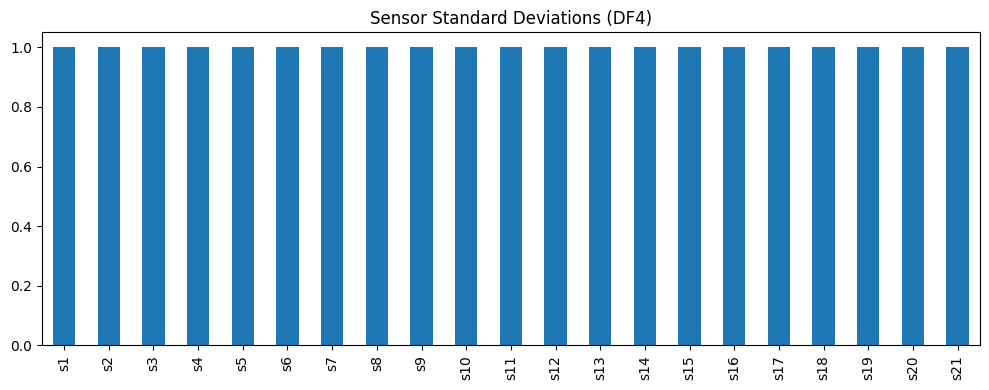


DF4 Dead Sensors: []


In [17]:
# Sensor trend visualization

import matplotlib.pyplot as plt

sensor_cols = [
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

dfs = {
    "DF1": df_1,
    "DF2": df_2,
    "DF3": df_3,
    "DF4": df_4
}

for name, df in dfs.items():


    plt.figure(figsize=(10,4))
    df.iloc[:, 5:26].std().plot(kind='bar')
    plt.title(f"Sensor Standard Deviations ({name})")
    plt.tight_layout()
    plt.show()

    dead_sensors = [col for col in sensor_cols if df[col].nunique() == 1]

    print(f"\n{name} Dead Sensors:", dead_sensors)


In [18]:
#Removing dead sensor columns

df_1 = df_1.drop(columns=[c for c in sensor_cols if df_1[c].nunique() == 1])
df_2 = df_2.drop(columns=[c for c in sensor_cols if df_2[c].nunique() == 1])
df_3 = df_3.drop(columns=[c for c in sensor_cols if df_3[c].nunique() == 1])
df_4 = df_4.drop(columns=[c for c in sensor_cols if df_4[c].nunique() == 1])

print(df_1.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)


(20631, 19)
(53759, 26)
(24720, 20)
(61249, 26)


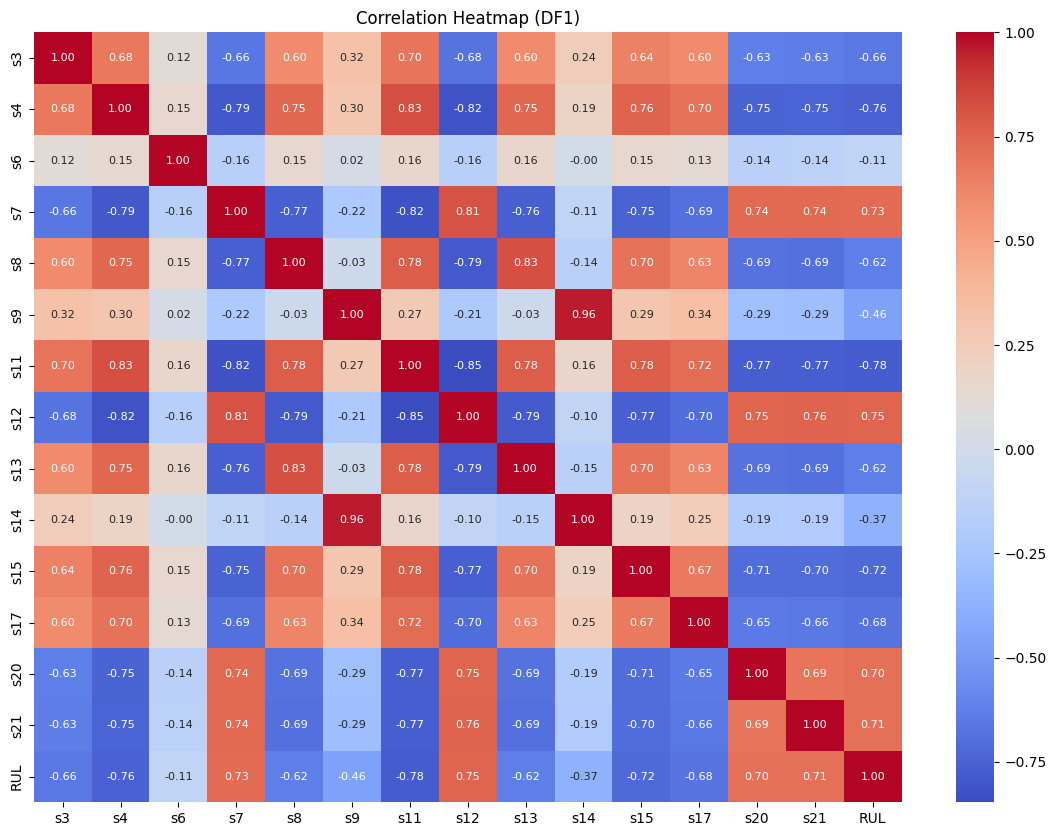

In [25]:

plt.figure(figsize=(14,10))
sns.heatmap(
    df_1.iloc[:, 5:26].corr(),
    cmap="coolwarm",
    annot=True,        #
    fmt=".2f",         
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap (DF1)")
plt.show()

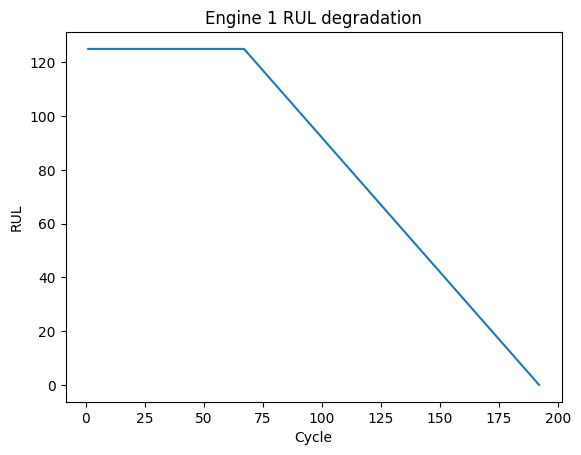

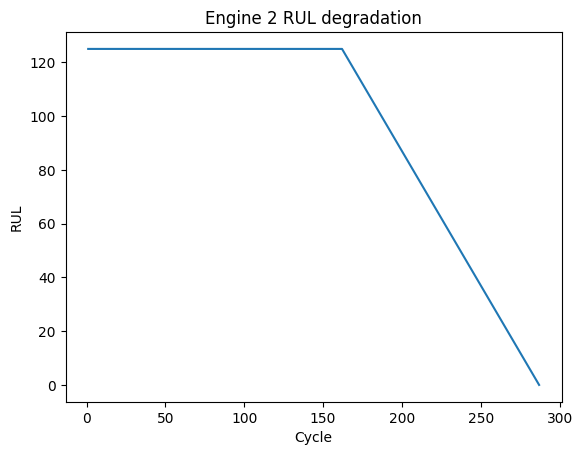

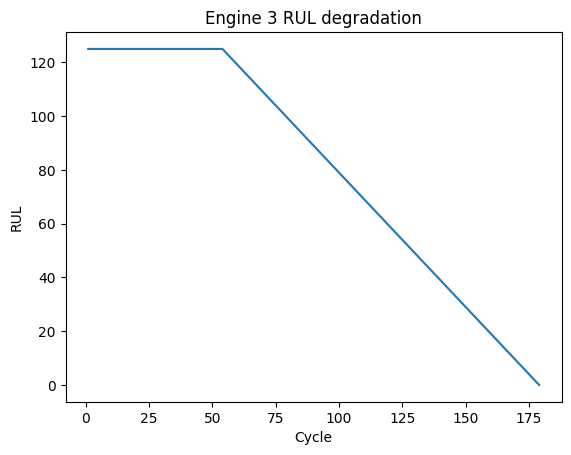

In [26]:
#RUL degradation

import matplotlib.pyplot as plt

sample_engines = df_1['engine_id'].unique()[:3]

for eng in sample_engines:
    temp = df_1[df_1.engine_id == eng]
    plt.plot(temp["cycle"], temp["RUL"])
    plt.title(f"Engine {eng} RUL degradation")
    plt.xlabel("Cycle")
    plt.ylabel("RUL")
    plt.show()


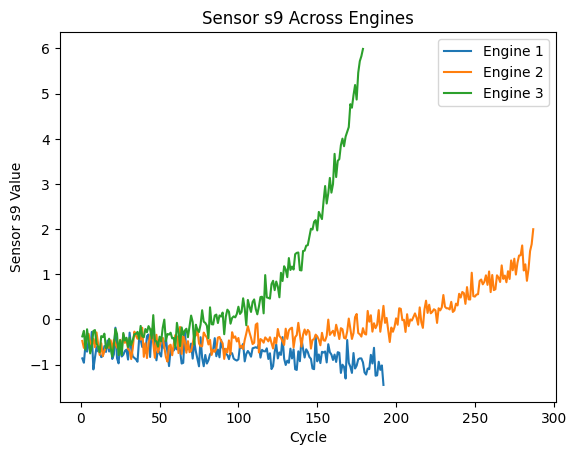

In [27]:
#Sensor s9 trend across engines

for eng in [1, 2, 3]:
    temp = df_1[df_1.engine_id == eng]
    plt.plot(temp["cycle"], temp["s9"], label=f"Engine {eng}")

plt.xlabel("Cycle")           
plt.ylabel("Sensor s9 Value") 
plt.legend()
plt.title("Sensor s9 Across Engines")
plt.show()


In [19]:
# RUL Calculation

def compute_rul(df):

    max_cycle_df = df.groupby("engine_id")["cycle"].max().reset_index()
    max_cycle_df.columns = ["engine_id", "max_cycle"]

    df = df.merge(max_cycle_df, on="engine_id", how="left")
    df["RUL"] = df["max_cycle"] - df["cycle"]
    df.drop(columns=["max_cycle"], inplace=True)
    
    return df

df_1 = compute_rul(df_1)
df_2 = compute_rul(df_2)
df_3 = compute_rul(df_3)
df_4 = compute_rul(df_4)
print(df_1.head())

   engine_id  cycle       op1       op2        s2        s3        s4  \
0          1      1 -0.315980 -1.372953 -1.721725 -0.134255 -0.925936   
1          1      2  0.872722 -1.031720 -1.061780  0.211528 -0.643726   
2          1      3 -1.961874  1.015677 -0.661813 -0.413166 -0.525953   
3          1      4  0.324090 -0.008022 -0.661813 -1.261314 -0.784831   
4          1      5 -0.864611 -0.690488 -0.621816 -1.251528 -0.301518   

         s6        s7        s8        s9       s11       s12       s13  \
0  0.141683  1.121141 -0.516338 -0.862813 -0.266467  0.334262 -1.058890   
1  0.141683  0.431930 -0.798093 -0.958818 -0.191583  1.174899 -0.363646   
2  0.141683  1.008155 -0.234584 -0.557139 -1.015303  1.364721 -0.919841   
3  0.141683  1.222827  0.188048 -0.713826 -1.539489  1.961302 -0.224597   
4  0.141683  0.714393 -0.516338 -0.457059 -0.977861  1.052871 -0.780793   

        s14       s15       s17       s20       s21  RUL  
0 -0.269071 -0.603816 -0.781710  1.348493  1.194427

In [20]:
# RUL Capping to 125 to remove outliers

df_1["RUL"] = df_1["RUL"].clip(upper=125)
df_2["RUL"] = df_2["RUL"].clip(upper=125)
df_3["RUL"] = df_3["RUL"].clip(upper=125)
df_4["RUL"] = df_4["RUL"].clip(upper=125)


In [ ]:
def create_sequences(df, sequence_length=50):
    X, y = [], []

    for engine_id in df['engine_id'].unique():
        engine_df = df[df['engine_id'] == engine_id].sort_values("cycle")

        engine_features = engine_df.drop(columns=["engine_id", "cycle", "RUL"]).values
        engine_rul = engine_df["RUL"].values

        n_cycles = engine_features.shape[0]

        # Skip series shorter than sequence_length
        if n_cycles < sequence_length:
            continue

        # Sliding window logic
        step = 1
        for start in range(0, n_cycles - sequence_length + 1, step):
            end = start + sequence_length
            X.append(engine_features[start:end])
            y.append(engine_rul[end - 1])  

    return np.array(X), np.array(y)



X_train_1, y_train_1 = create_sequences(df_1)
X_train_2, y_train_2 = create_sequences(df_2)
X_train_3, y_train_3 = create_sequences(df_3)
X_train_4, y_train_4 = create_sequences(df_4)

print(X_train_1.shape, y_train_1.shape)
print(X_train_2.shape, y_train_2.shape)
print(X_train_3.shape, y_train_3.shape)
print(X_train_4.shape, y_train_4.shape)



(15731, 50, 17) (15731,)
(41019, 50, 24) (41019,)
(19820, 50, 18) (19820,)
(49048, 50, 24) (49048,)


In [28]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from dataclasses import dataclass
from typing import Tuple


In [ ]:
class RULDataset(Dataset):
    """Custom Dataset """

    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

    def __len__(self) -> int:
        return len(self.X)
    
    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor]:
        return self.X[idx], self.y[idx]

In [30]:


import torch
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size: int, units: int = 128, dropout: float = 0.3):
        super().__init__()

        
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=units,
            num_layers=1,        
            batch_first=True
        )

        self.bn = nn.BatchNorm1d(units)

        self.dropout = nn.Dropout(dropout)

        self.fc = nn.Sequential(
            nn.Linear(units, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        out, _ = self.gru(x)     # shape: (batch, seq_len, units)
        out = out[:, -1, :]      # last timestep (return_sequences=False)

        out = self.bn(out)       # BatchNorm expects (batch, features)
        out = self.dropout(out)
        out = self.fc(out)

        return out



In [31]:
@dataclass
class TrainConfig:
    epochs: int = 60
    batch_size: int = 64
    lr: float = 1e-3
    val_split: float = 0.2
    patience: int = 7

In [ ]:
def train_model(
        model,
        train_loader,
        val_loader,
        config: TrainConfig
):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

    best_val_loss = float('inf')

    train_losses = []
    val_losses = []

    for epoch in range(1, config.epochs + 1):
        
        model.train()
        train_loss = 0.0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() 

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f"Epoch {epoch}/{config.epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pth")


    return train_losses, val_losses

In [33]:
def plot_loss(train_losses, val_losses, title="Training vs Validation Loss"):
    plt.figure(figsize=(8,5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [34]:

def train_single_model(X_train, y_train, save_path="model.pth"):
    config = TrainConfig()

    dataset = RULDataset(X_train, y_train)

    val_size = int(len(dataset) * config.val_split)
    train_size = len(dataset) - val_size
    train_ds, val_ds = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_ds, batch_size=config.batch_size, shuffle=True)
    val_loader = DataLoader(val_ds, batch_size=config.batch_size, shuffle=False)

    input_size = X_train.shape[2]
    model = GRUModel(input_size=input_size)

    train_losses, val_losses = train_model(model, train_loader, val_loader, config)

    model.load_state_dict(torch.load("best_model.pth"))
    torch.save(model.state_dict(), save_path)
    print(f"Final model saved as {save_path}")

    plot_loss(train_losses, val_losses, title="Training vs Validation Loss")


Epoch 1/60 - Train Loss: 2669.1639 - Val Loss: 573.2696
Epoch 2/60 - Train Loss: 596.1846 - Val Loss: 393.2873
Epoch 3/60 - Train Loss: 446.1845 - Val Loss: 230.3189
Epoch 4/60 - Train Loss: 350.3572 - Val Loss: 173.7884
Epoch 5/60 - Train Loss: 276.1195 - Val Loss: 140.8575
Epoch 6/60 - Train Loss: 277.3747 - Val Loss: 202.5363
Epoch 7/60 - Train Loss: 237.3797 - Val Loss: 132.9562
Epoch 8/60 - Train Loss: 246.9284 - Val Loss: 146.2601
Epoch 9/60 - Train Loss: 217.7717 - Val Loss: 122.7872
Epoch 10/60 - Train Loss: 199.3299 - Val Loss: 137.7134
Epoch 11/60 - Train Loss: 323.7824 - Val Loss: 149.4553
Epoch 12/60 - Train Loss: 213.1887 - Val Loss: 116.0362
Epoch 13/60 - Train Loss: 207.1445 - Val Loss: 149.9219
Epoch 14/60 - Train Loss: 175.4018 - Val Loss: 126.0992
Epoch 15/60 - Train Loss: 175.2020 - Val Loss: 107.5031
Epoch 16/60 - Train Loss: 163.5030 - Val Loss: 99.5541
Epoch 17/60 - Train Loss: 161.6590 - Val Loss: 114.6311
Epoch 18/60 - Train Loss: 152.8270 - Val Loss: 87.7629
Ep

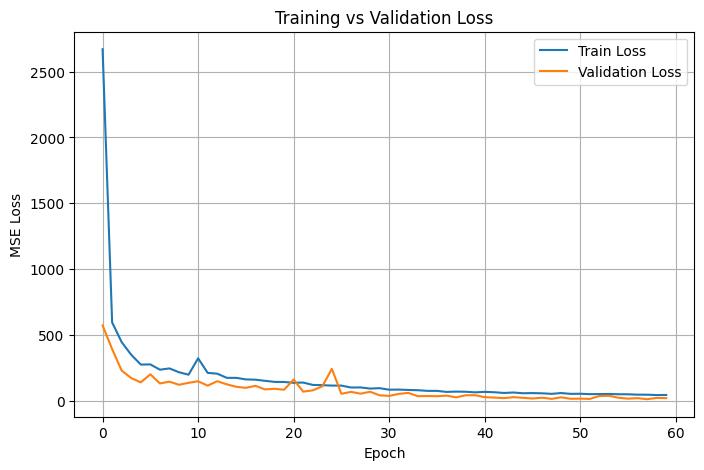

In [30]:
#df1

train_single_model(
    X_train_1, y_train_1,
    save_path="model_ds1.pth"
)

Epoch 1/60 - Train Loss: 1960.2178 - Val Loss: 525.3472
Epoch 2/60 - Train Loss: 557.3784 - Val Loss: 500.5913
Epoch 3/60 - Train Loss: 483.2874 - Val Loss: 420.7778
Epoch 4/60 - Train Loss: 353.9500 - Val Loss: 233.1857
Epoch 5/60 - Train Loss: 296.3795 - Val Loss: 261.5100
Epoch 6/60 - Train Loss: 257.8239 - Val Loss: 145.3454
Epoch 7/60 - Train Loss: 220.4540 - Val Loss: 224.6874
Epoch 8/60 - Train Loss: 186.3996 - Val Loss: 99.8048
Epoch 9/60 - Train Loss: 165.1111 - Val Loss: 150.5845
Epoch 10/60 - Train Loss: 146.3424 - Val Loss: 71.2489
Epoch 11/60 - Train Loss: 126.2845 - Val Loss: 54.4629
Epoch 12/60 - Train Loss: 118.6728 - Val Loss: 120.4436
Epoch 13/60 - Train Loss: 113.6612 - Val Loss: 51.7838
Epoch 14/60 - Train Loss: 100.4795 - Val Loss: 43.2223
Epoch 15/60 - Train Loss: 94.7344 - Val Loss: 76.0110
Epoch 16/60 - Train Loss: 91.0149 - Val Loss: 32.2573
Epoch 17/60 - Train Loss: 86.9730 - Val Loss: 39.9247
Epoch 18/60 - Train Loss: 85.1613 - Val Loss: 44.2691
Epoch 19/60 -

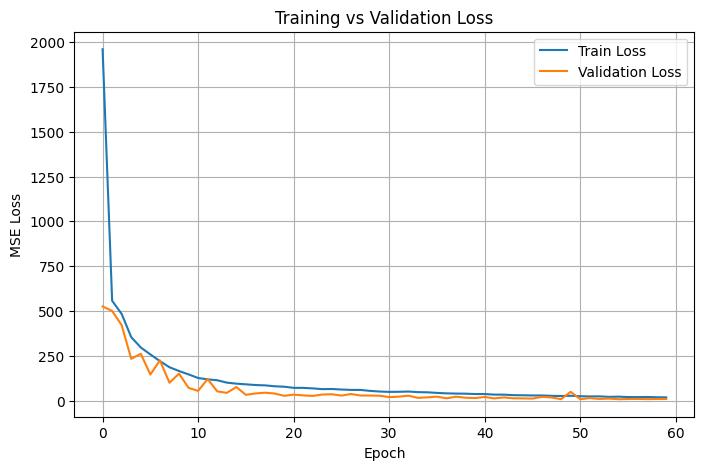

In [31]:
#df2

train_single_model(
    X_train_2, y_train_2,
    save_path="model_ds2.pth"
)

Epoch 1/60 - Train Loss: 2757.9745 - Val Loss: 295.1515
Epoch 2/60 - Train Loss: 727.7706 - Val Loss: 3567.7416
Epoch 3/60 - Train Loss: 628.3891 - Val Loss: 295.0823
Epoch 4/60 - Train Loss: 440.6654 - Val Loss: 265.4994
Epoch 5/60 - Train Loss: 454.5645 - Val Loss: 267.5417
Epoch 6/60 - Train Loss: 426.8398 - Val Loss: 230.4952
Epoch 7/60 - Train Loss: 386.8789 - Val Loss: 209.8433
Epoch 8/60 - Train Loss: 349.8770 - Val Loss: 184.2178
Epoch 9/60 - Train Loss: 366.5589 - Val Loss: 191.2502
Epoch 10/60 - Train Loss: 321.2083 - Val Loss: 156.6322
Epoch 11/60 - Train Loss: 302.2863 - Val Loss: 156.0292
Epoch 12/60 - Train Loss: 283.4989 - Val Loss: 135.2378
Epoch 13/60 - Train Loss: 277.7281 - Val Loss: 135.7174
Epoch 14/60 - Train Loss: 259.0384 - Val Loss: 127.3970
Epoch 15/60 - Train Loss: 261.0111 - Val Loss: 143.8555
Epoch 16/60 - Train Loss: 242.3262 - Val Loss: 127.7976
Epoch 17/60 - Train Loss: 230.4929 - Val Loss: 121.6547
Epoch 18/60 - Train Loss: 216.7665 - Val Loss: 122.8367

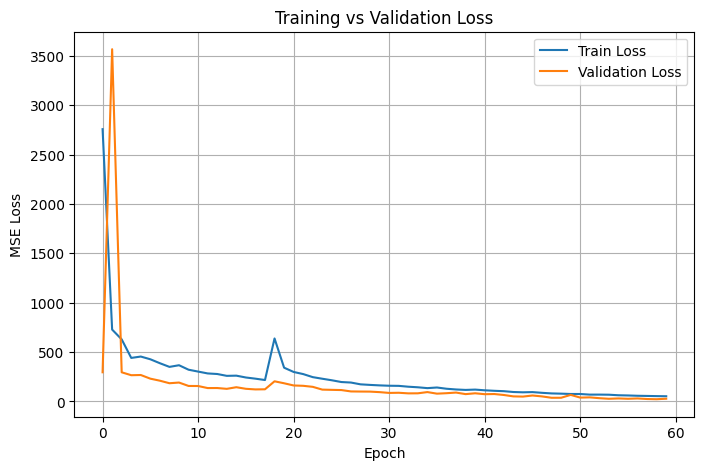

In [ ]:
#df3

train_single_model(
    X_train_3, y_train_3,
    save_path="model_ds3.pth"
)

Epoch 1/60 - Train Loss: 1764.2447 - Val Loss: 515.1200
Epoch 2/60 - Train Loss: 639.2844 - Val Loss: 491.0609
Epoch 3/60 - Train Loss: 581.2892 - Val Loss: 541.2173
Epoch 4/60 - Train Loss: 481.1808 - Val Loss: 326.0631
Epoch 5/60 - Train Loss: 398.3758 - Val Loss: 329.2436
Epoch 6/60 - Train Loss: 361.7847 - Val Loss: 314.3439
Epoch 7/60 - Train Loss: 323.8872 - Val Loss: 247.4034
Epoch 8/60 - Train Loss: 309.9197 - Val Loss: 228.4387
Epoch 9/60 - Train Loss: 284.3247 - Val Loss: 196.5180
Epoch 10/60 - Train Loss: 269.6965 - Val Loss: 214.9363
Epoch 11/60 - Train Loss: 247.1037 - Val Loss: 175.5331
Epoch 12/60 - Train Loss: 217.5774 - Val Loss: 182.1758
Epoch 13/60 - Train Loss: 191.3386 - Val Loss: 143.0989
Epoch 14/60 - Train Loss: 166.4114 - Val Loss: 135.1807
Epoch 15/60 - Train Loss: 148.8726 - Val Loss: 85.9268
Epoch 16/60 - Train Loss: 131.6528 - Val Loss: 72.4920
Epoch 17/60 - Train Loss: 119.0153 - Val Loss: 74.9125
Epoch 18/60 - Train Loss: 106.3083 - Val Loss: 74.6389
Epoc

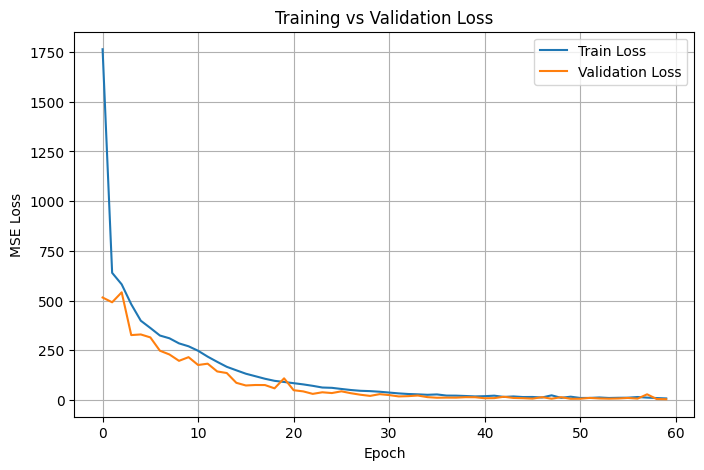

In [33]:
#df4

train_single_model(
    X_train_4, y_train_4,
    save_path="model_ds4.pth"
)

# TEST DATASET


In [ ]:

df_test_1 = pd.read_csv("../dataset/test_FD001.txt", sep=" ", header=None)
df_test_2 = pd.read_csv("../dataset/test_FD002.txt", sep=" ", header=None)
df_test_3 = pd.read_csv("../dataset/test_FD003.txt", sep=" ", header=None)
df_test_4 = pd.read_csv("../dataset/test_FD004.txt", sep=" ", header=None)

print(df_test_1.head())

   0   1       2       3      4       5       6        7        8      9   \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8125.55  8.4052  0.03  392  2388  100.0  38.86  23.3735 NaN NaN  
1  ...  8139.62  8.3803  0.03  393  2388  100.0  39.02  23.3916 NaN NaN  
2  ...  8130.10  8.4441  0.03  393  2388  100.0  39.08  23.4166 NaN NaN  
3  ...  8132.90  8.3917  0.03  391  2388  100.0  39.00  23.3737 NaN NaN  
4  ...  8129.54  8.4031  0.03  390  2388  100.0  38.99  23.4130 NaN NaN  

[5 rows x 28 columns]


In [38]:
#Removing NaN columns

df_test_1 = df_test_1.iloc[:, :26]
df_test_2 = df_test_2.iloc[:, :26]
df_test_3 = df_test_3.iloc[:, :26]
df_test_4 = df_test_4.iloc[:, :26]

print(df_test_1.head())


   0   1       2       3      4       5       6        7        8      9   \
0   1   1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21  14.62   
1   1   2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42  14.62   
2   1   3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34  14.62   
3   1   4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42  14.62   
4   1   5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0  38.86   
1  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0  39.02   
2  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0  39.08   
3  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0  39.00   
4  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0  38.99   

        25  
0  23.3735  
1  23.3916  
2  23.4166  
3  23.3737  
4  23.4130  

[5 rows

In [39]:
col_names = [
    "engine_id", "cycle",
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

# Assign to test datasets
df_test_1.columns = col_names
df_test_2.columns = col_names
df_test_3.columns = col_names
df_test_4.columns = col_names
print(df_test_1.head())

   engine_id  cycle     op1     op2    op3      s1      s2       s3       s4  \
0          1      1  0.0023  0.0003  100.0  518.67  643.02  1585.29  1398.21   
1          1      2 -0.0027 -0.0003  100.0  518.67  641.71  1588.45  1395.42   
2          1      3  0.0003  0.0001  100.0  518.67  642.46  1586.94  1401.34   
3          1      4  0.0042  0.0000  100.0  518.67  642.44  1584.12  1406.42   
4          1      5  0.0014  0.0000  100.0  518.67  642.51  1587.19  1401.92   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   
2  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03  393  2388  100.0   
3  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03  391  2388  100.0   
4  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03  390  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  
2  39.08

In [ ]:
# Normalizing test datasets

sensor_cols = [
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

def normalize_test(df, scaler_path):
    scaler = joblib.load(scaler_path)
    df[sensor_cols] = scaler.transform(df[sensor_cols])
    return df

df_test_1 = normalize_test(df_test_1, "FD001_scaler.joblib")
df_test_2 = normalize_test(df_test_2, "FD002_scaler.joblib")
df_test_3 = normalize_test(df_test_3, "FD003_scaler.joblib")
df_test_4 = normalize_test(df_test_4, "FD004_scaler.joblib")

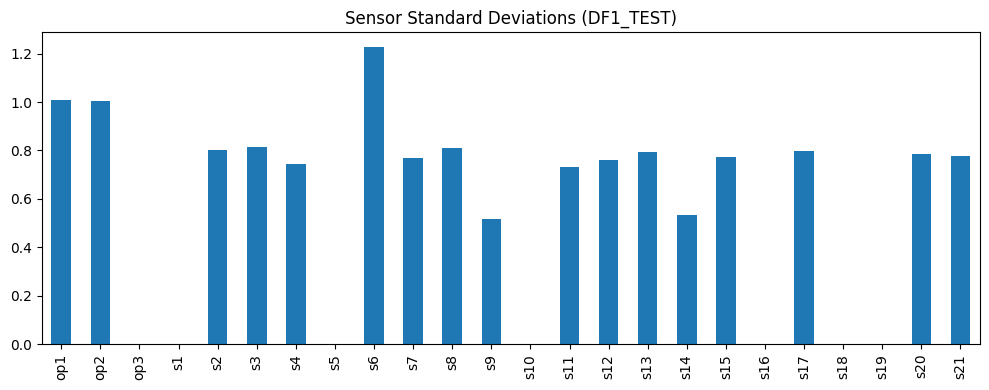


DF1_TEST Dead Sensors: ['op3', 's1', 's5', 's10', 's16', 's18', 's19']


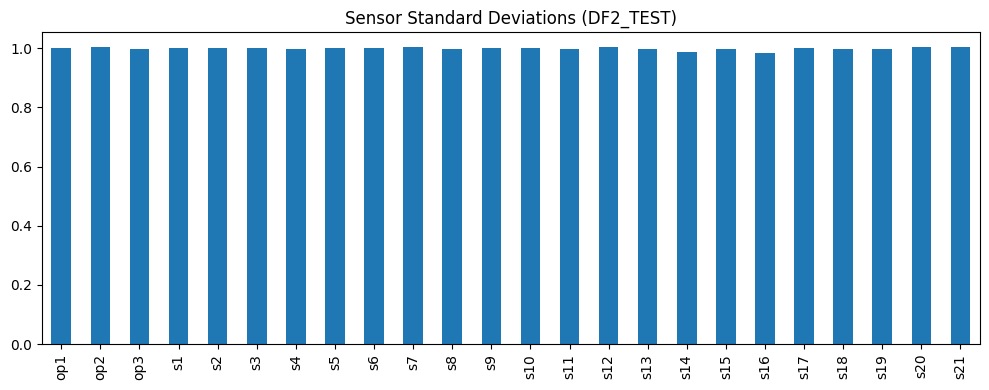


DF2_TEST Dead Sensors: []


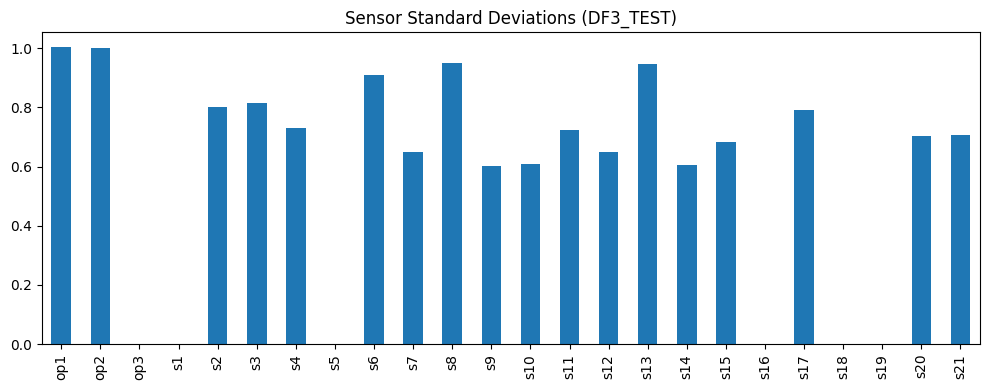


DF3_TEST Dead Sensors: ['op3', 's1', 's5', 's16', 's18', 's19']


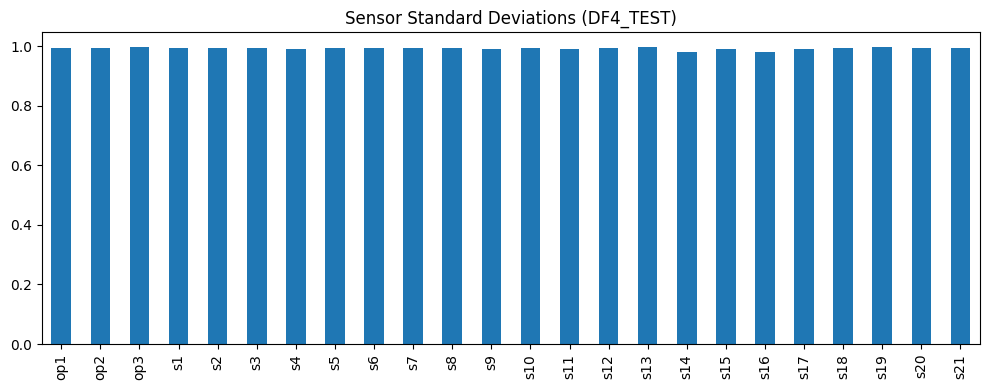


DF4_TEST Dead Sensors: []


In [ ]:

sensor_cols = [
    "op1", "op2", "op3",
    "s1","s2","s3","s4","s5",
    "s6","s7","s8","s9","s10",
    "s11","s12","s13","s14","s15",
    "s16","s17","s18","s19","s20","s21"
]

dfs_test = {
    "DF1_TEST": df_test_1,
    "DF2_TEST": df_test_2,
    "DF3_TEST": df_test_3,
    "DF4_TEST": df_test_4
}

for name, df in dfs_test.items():

    plt.figure(figsize=(10,4))
    df[sensor_cols].std().plot(kind='bar')
    plt.title(f"Sensor Standard Deviations ({name})")
    plt.tight_layout()
    plt.show()

    dead_sensors = [col for col in sensor_cols if df[col].nunique() == 1]

    print(f"\n{name} Dead Sensors:", dead_sensors)


In [43]:
dead_sensors_1 = [c for c in sensor_cols if df_test_1[c].nunique() == 1]
dead_sensors_2 = [c for c in sensor_cols if df_test_2[c].nunique() == 1]
dead_sensors_3 = [c for c in sensor_cols if df_test_3[c].nunique() == 1]
dead_sensors_4 = [c for c in sensor_cols if df_test_4[c].nunique() == 1]

df_test_1 = df_test_1.drop(columns=dead_sensors_1)
df_test_2 = df_test_2.drop(columns=dead_sensors_2)
df_test_3 = df_test_3.drop(columns=dead_sensors_3)
df_test_4 = df_test_4.drop(columns=dead_sensors_4)

print(df_test_1.shape)
print(df_1.shape)

(13096, 19)
(20631, 28)


In [ ]:
import pandas as pd

rul_test_1 = pd.read_csv("../dataset/RUL_FD001.txt", header=None).values.flatten()
rul_test_2 = pd.read_csv("../dataset/RUL_FD002.txt", header=None).values.flatten()
rul_test_3 = pd.read_csv("../dataset/RUL_FD003.txt", header=None).values.flatten()
rul_test_4 = pd.read_csv("../dataset/RUL_FD004.txt", header=None).values.flatten()

In [45]:
rul_test_1 = np.minimum(rul_test_1, 125)
rul_test_2 = np.minimum(rul_test_2, 125)
rul_test_3 = np.minimum(rul_test_3, 125)
rul_test_4 = np.minimum(rul_test_4, 125)

In [46]:
import numpy as np
import torch

def create_test_sequences(df, sequence_length=50):
    X = []
    engine_ids = df['engine_id'].unique()

    for eid in engine_ids:
        engine_df = df[df['engine_id'] == eid].sort_values("cycle")
        engine_features = engine_df.drop(columns=['engine_id', 'cycle']).values
        n_cycles = engine_features.shape[0]

        if n_cycles >= sequence_length:
            X.append(engine_features[-sequence_length:])
        else:
            pad = np.zeros((sequence_length - n_cycles, engine_features.shape[1]))
            X.append(np.vstack([pad, engine_features]))

    return np.array(X)

X_test_1 = torch.tensor(create_test_sequences(df_test_1, sequence_length=50), dtype=torch.float32)
X_test_2 = torch.tensor(create_test_sequences(df_test_2, sequence_length=50), dtype=torch.float32)
X_test_3 = torch.tensor(create_test_sequences(df_test_3, sequence_length=50), dtype=torch.float32)
X_test_4 = torch.tensor(create_test_sequences(df_test_4, sequence_length=50), dtype=torch.float32)


In [ ]:
def predict_rul(X_seq, model_path):
    input_size = X_seq.shape[2]
    model = GRUModel(input_size=input_size)
    model.load_state_dict(torch.load(model_path))
    model.eval()

    with torch.no_grad():
        preds = model(X_seq).numpy()
    return preds

preds_1 = predict_rul(X_test_1, "../models/model_ds1.pth")
preds_2 = predict_rul(X_test_2, "../models/model_ds2.pth")
preds_3 = predict_rul(X_test_3, "../models/model_ds3.pth")
preds_4 = predict_rul(X_test_4, "../models/model_ds4.pth")

In [48]:
from sklearn.metrics import mean_squared_error

mse_1 = mean_squared_error(rul_test_1, preds_1)
mse_2 = mean_squared_error(rul_test_2, preds_2)
mse_3 = mean_squared_error(rul_test_3, preds_3)
mse_4 = mean_squared_error(rul_test_4, preds_4)

rmse_1 = np.sqrt(mse_1)
rmse_2 = np.sqrt(mse_2)
rmse_3 = np.sqrt(mse_3)
rmse_4 = np.sqrt(mse_4)

print(f"Test RMSE DF1: {rmse_1:.4f}")
print(f"Test RMSE DF2: {rmse_2:.4f}")
print(f"Test RMSE DF3: {rmse_3:.4f}")
print(f"Test RMSE DF4: {rmse_4:.4f}")


Test RMSE DF1: 15.1809
Test RMSE DF2: 18.7860
Test RMSE DF3: 13.2864
Test RMSE DF4: 21.9243


In [ ]:
def plot_rul_series(true, preds):
   plt.figure(figsiz=(10,5))
   plt.plot(true, label="Actual RUL", linewidth=2)
   plt.plot(preds, label="Predicted RUL", linewidth=2)

   plt.title("Predicted vs Actual RUL")
   plt.xlabel("Sample Index")
   plt.ylabel("RUL")
   plt.legend()
   plt.grid(True)
   plt.show()


In [33]:
def plot_rul_scatter(true, preds):
    plt.figure(figsize=(6,6))
    plt.scatter(true, preds, alpha=0.6)
    plt.plot([min(true), max(true)], [min(true), max(true)], 'r--')  # y=x line
    
    plt.title("Scatter Plot: Actual RUL vs Predicted RUL")
    plt.xlabel("Actual RUL")
    plt.ylabel("Predicted RUL")
    plt.grid(True)
    plt.show()


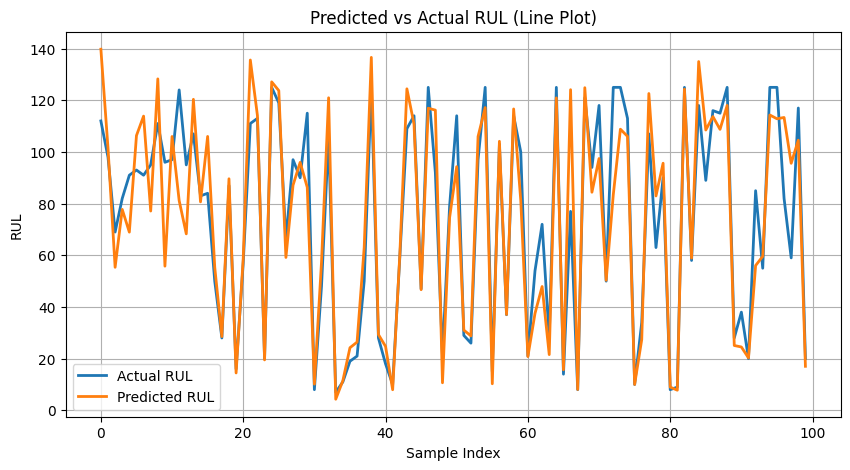

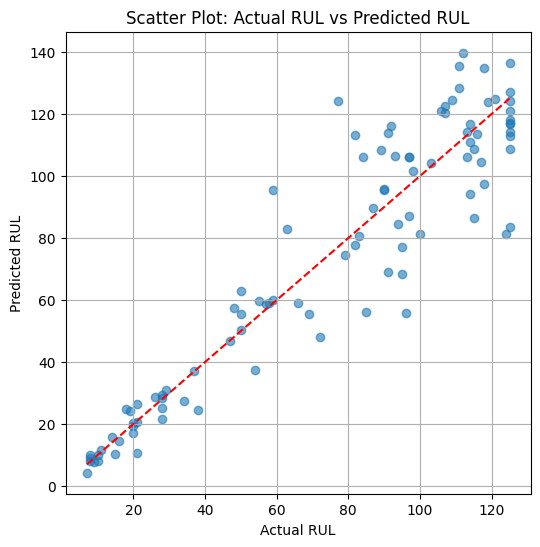

In [34]:
plot_rul_series(rul_test_1, preds_1)
plot_rul_scatter(rul_test_1, preds_1)


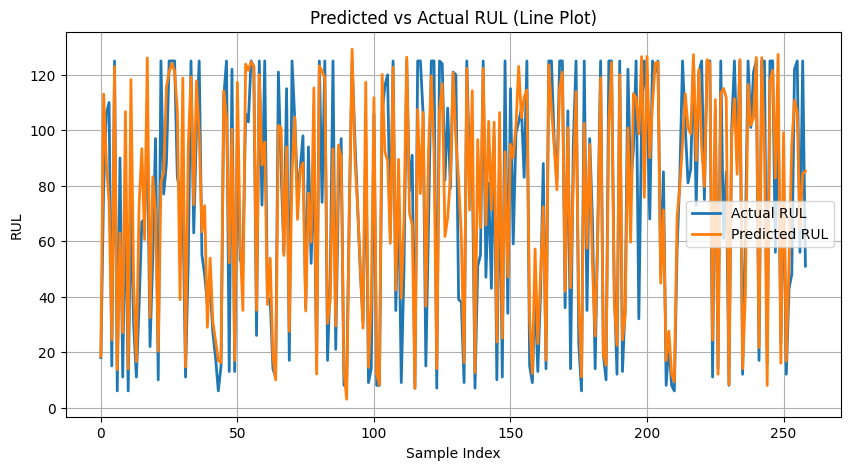

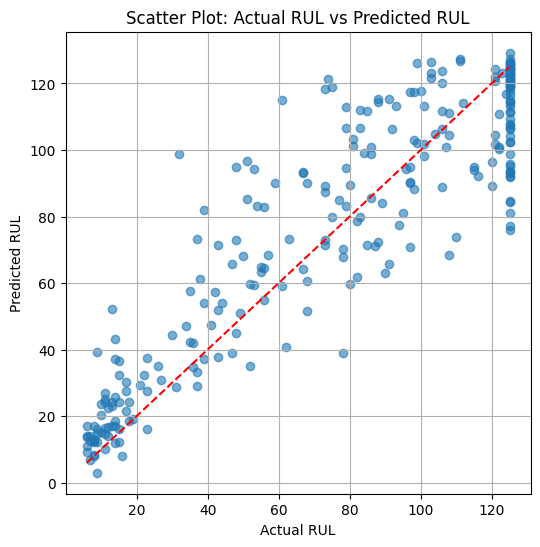

In [35]:
plot_rul_series(rul_test_2, preds_2)
plot_rul_scatter(rul_test_2, preds_2)


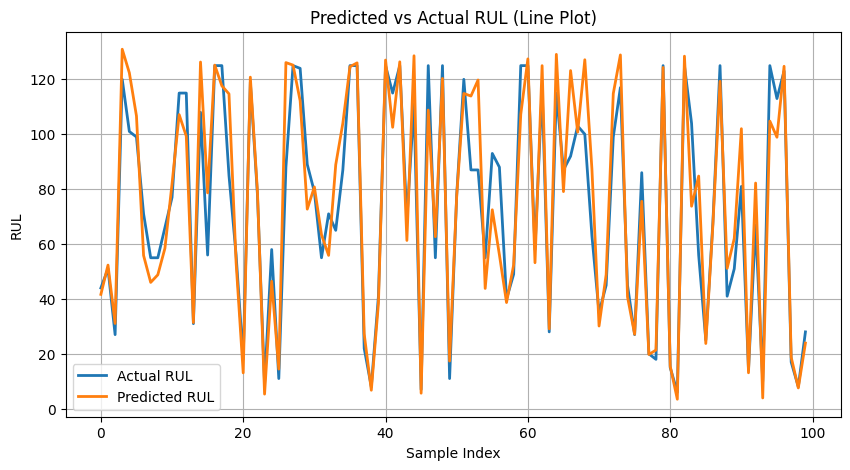

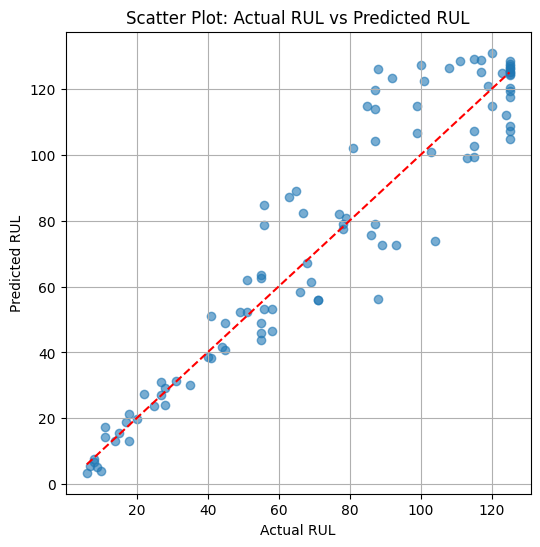

In [36]:
plot_rul_series(rul_test_3, preds_3)
plot_rul_scatter(rul_test_3, preds_3)


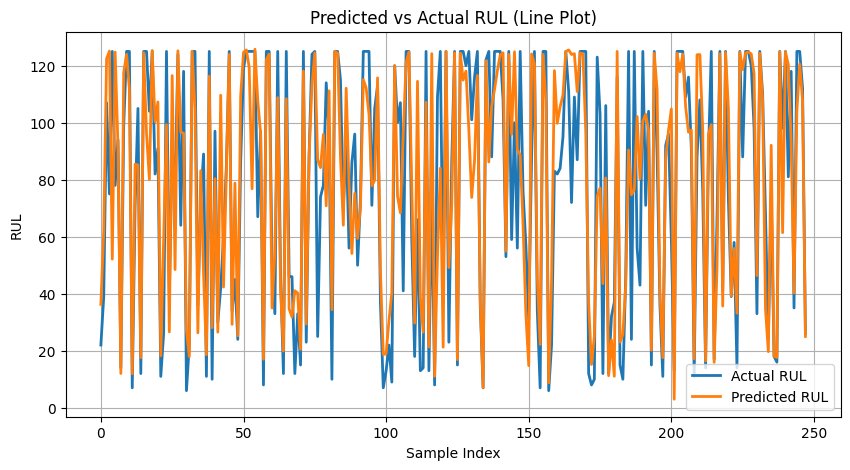

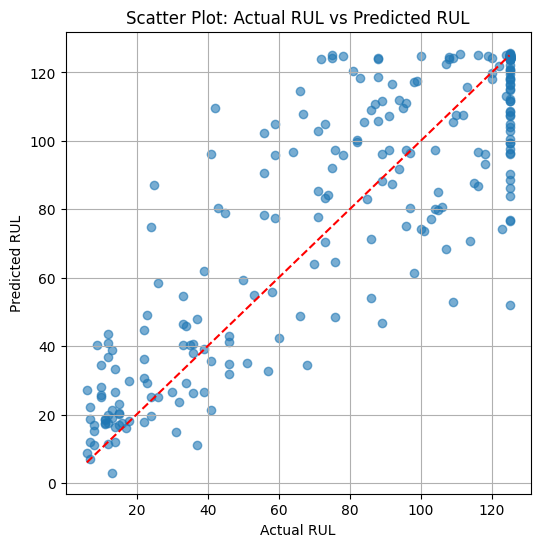

In [37]:
plot_rul_series(rul_test_4, preds_4)
plot_rul_scatter(rul_test_4, preds_4)
